<a href="https://colab.research.google.com/github/michelleruas/Data_Visualisation_Techniques/blob/master/Diabetes_Artificial_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Artificial Neural Network to detect diabetes

This program detects if a person has diabetes or not.

In [1]:
#Load libraries
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
#Load the data
from google.colab import files
uploaded = files.upload()


Saving diabetes.csv to diabetes.csv


In [3]:
#Store the dataset
df = pd.read_csv('diabetes.csv')

#Print the first 7 rows of data
df.head(7)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1


In [4]:
#Show shape of data
df.shape

(768, 9)

In [5]:
#Check for duplicates and remove them
df.drop_duplicates(inplace= True)

In [6]:
#Show shape of data
df.shape

(768, 9)

In [7]:
#Show number of missing data
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
#Convert the data into an array
dataset = df.values
dataset

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [12]:
#Get all of the rows from the first eight columns
#X is the feature / independent dataset, Y is the target dataset / dependent
X = dataset[:, 0:8]
Y = dataset[:, 8]

In [15]:
#Uses min max scalar method so that all of the features lie between 0 and 1 which helps the neural network to make its predictions
#Process the data
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_scale

array([[0.35294118, 0.74371859, 0.59016393, ..., 0.50074516, 0.23441503,
        0.48333333],
       [0.05882353, 0.42713568, 0.54098361, ..., 0.39642325, 0.11656704,
        0.16666667],
       [0.47058824, 0.91959799, 0.52459016, ..., 0.34724292, 0.25362938,
        0.18333333],
       ...,
       [0.29411765, 0.6080402 , 0.59016393, ..., 0.390462  , 0.07130658,
        0.15      ],
       [0.05882353, 0.63316583, 0.49180328, ..., 0.4485842 , 0.11571307,
        0.43333333],
       [0.05882353, 0.46733668, 0.57377049, ..., 0.45305514, 0.10119556,
        0.03333333]])

In [17]:
#Split the date into 80% training and 20% testing
#Random state means every time you run it without setting random state, the results will be the same each time you run
x_train, x_test, y_train, y_test = train_test_split(X_scale, Y, test_size = 0.2, random_state = 4)

In [20]:
#Build the model with three layers of neural networks

model = Sequential([ 
                    Dense(12, activation='relu', input_shape=(8,)),
                    Dense(15, activation='relu'),
                    Dense(1, activation='sigmoid')
])

In [24]:
#Compile the model, loss function measures how well the model did on trianing and works to improve it
model.compile(
    optimizer = 'sgd',
    loss = 'binary_crossentropy',
    metrics=['accuracy']
)

In [26]:
#Train the model

hist = model.fit(x_train, y_train, batch_size = 57, epochs=1000, validation_split = 0.2)

Epoch 1/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.5200 - accuracy: 0.7373 - val_loss: 0.5416 - val_accuracy: 0.7154
Epoch 2/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.5194 - accuracy: 0.7373 - val_loss: 0.5413 - val_accuracy: 0.7073
Epoch 3/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.5185 - accuracy: 0.7413 - val_loss: 0.5409 - val_accuracy: 0.7154
Epoch 4/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.5181 - accuracy: 0.7454 - val_loss: 0.5405 - val_accuracy: 0.7154
Epoch 5/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.5178 - accuracy: 0.7434 - val_loss: 0.5401 - val_accuracy: 0.7236
Epoch 6/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.5174 - accuracy: 0.7393 - val_loss: 0.5398 - val_accuracy: 0.7236
Epoch 7/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.5170 - accuracy: 0.7475 - val_loss: 0.5396 - val_accuracy: 0.7236
Epoch 8/1000
9/9 [==

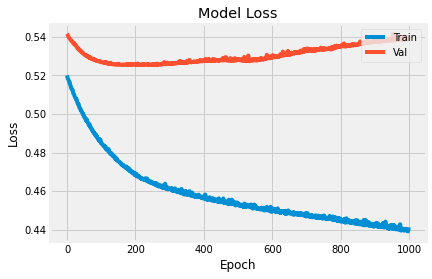

In [27]:
#Visualize the training loss and the validation loss to see if the model is overfitting
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc = 'upper right')
plt.show()

In [40]:
#Make a prediction and print the actual values
prediction = model.predict(x_test)
prediction = [1 if y>=0.5 else 0 for y in prediction]
print(prediction)
print(y_test)

[0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1]
[0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1.
 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1.
 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1.
 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 1. 1. 1. 0. 0. 0. 0. 0. 1. 1.]


In [44]:
#Evaluate model on the training data set
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

pred = model.predict(x_train)
pred = [1 if y>0.5 else 0 for y in pred]
print(classification_report(y_train, pred))
print('Confusion Matrix: \n', confusion_matrix(y_train, pred))
print()
print('Accuracy: ', accuracy_score(y_train, pred))

              precision    recall  f1-score   support

         0.0       0.79      0.89      0.84       398
         1.0       0.73      0.57      0.64       216

    accuracy                           0.78       614
   macro avg       0.76      0.73      0.74       614
weighted avg       0.77      0.78      0.77       614

Confusion Matrix: 
 [[353  45]
 [ 93 123]]

Accuracy:  0.7752442996742671


In [45]:
#Evaluate model on the testing data set
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

pred = model.predict(x_test)
pred = [1 if y>0.5 else 0 for y in pred]
print(classification_report(y_test, pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, pred))
print()
print('Accuracy: ', accuracy_score(y_test, pred))

              precision    recall  f1-score   support

         0.0       0.83      0.83      0.83       102
         1.0       0.67      0.65      0.66        52

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.77      0.77      0.77       154

Confusion Matrix: 
 [[85 17]
 [18 34]]

Accuracy:  0.7727272727272727


This model correctly predict 77% of the testing data, which is a good start but has lots of room for improvement. 